In [1]:
#import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Relaince_stock.csv')
df = data.copy() #making a copy of the original dataset so that you wont modify the original

In [3]:
df.head() #first 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.060585,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.316597,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.714115,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.096405,128426756.0


In [4]:
df.tail() #bottom 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume
5750,2022-12-26,2514.750000,2542.000000,2492.399902,2524.050049,2524.050049,2764496.0
5751,2022-12-27,2530.000000,2548.800049,2515.250000,2544.699951,2544.699951,2659749.0
5752,2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951,2544.449951,3442509.0
5753,2022-12-29,2527.000000,2548.899902,2525.500000,2543.300049,2543.300049,3198493.0
5754,2022-12-30,2545.100098,2577.000000,2541.100098,2547.199951,2547.199951,3364092.0


In [5]:
df.shape

(5755, 7)

In [6]:
#check for null values
df.isnull().sum()

Date          0
Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [7]:
#drop null values if any
df.dropna(inplace=True)
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#check for duplicates 
df.duplicated().sum()

0

In [9]:
#info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5745 entries, 0 to 5754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5745 non-null   object 
 1   Open       5745 non-null   float64
 2   High       5745 non-null   float64
 3   Low        5745 non-null   float64
 4   Close      5745 non-null   float64
 5   Adj Close  5745 non-null   float64
 6   Volume     5745 non-null   float64
dtypes: float64(6), object(1)
memory usage: 359.1+ KB


In [10]:
#convert the Date datatype from object to date format
df['Date'] = pd.to_datetime(df.Date)

In [11]:
print("Date datatype: ", df.Date.dtype)

Date datatype:  datetime64[ns]


In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.060585,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.316597,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.714115,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.096405,128426756.0


In [13]:
#sort dataset by date values
df.sort_values(by="Date", inplace = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.060585,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.316597,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.714115,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.096405,128426756.0


In [14]:
df.shape

(5745, 7)

In [15]:
#Get the duration of the dataset 
print("Starting Date: ",df.iloc[0][0])
print("Ending Date: ",df.iloc[-1][0])
print("Duration: ",df.iloc[-1][0]-df.iloc[0][0])

Starting Date:  2000-01-03 00:00:00
Ending Date:  2022-12-30 00:00:00
Duration:  8397 days 00:00:00


In [16]:
#making a copy of new dataframe before setting the index
df1 = df.copy()

In [17]:
#set the date column as index 
df.set_index(df.Date,inplace=True)
df.drop('Date',axis=1,inplace=True)

In [18]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0


In [19]:
#use describe() function for statistical insights
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5.745000e+03
mean,638.461095,646.283828,630.097175,637.879417,615.592615,1.681692e+07
std,679.735286,687.198000,671.907024,679.242266,682.151473,1.809928e+07
min,31.796223,33.962387,30.504259,31.440351,23.964357,0.000000e+00
25%,101.221848,103.666519,99.837044,101.291473,89.115646,6.334809e+06
50%,446.368866,450.975220,440.573792,446.145996,418.400177,1.016516e+07
75%,681.056763,690.801880,668.661743,675.992249,638.090271,2.036854e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,2.918015e+08


## EDA

## Monthwise comparision between Stock actual, open and close price

In [ ]:
monthwise= df1.groupby(df1['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')
monthwise

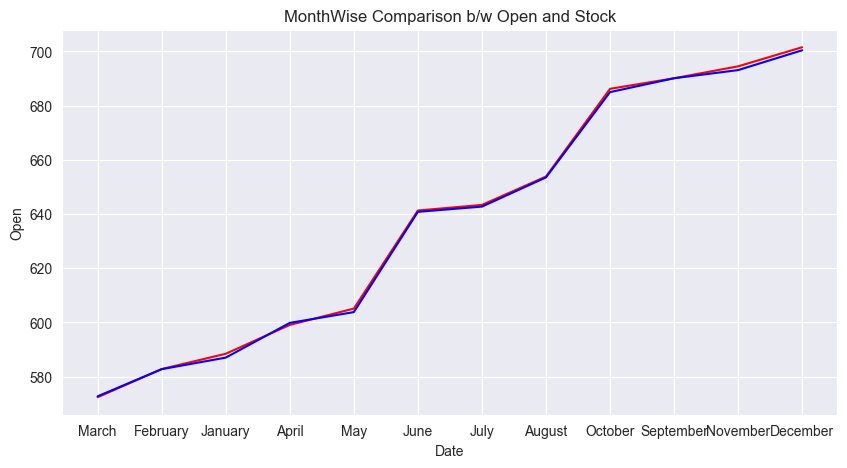

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(x=monthwise.index, y=monthwise["Open"],color='red')
sns.lineplot(x=monthwise.index, y=monthwise["Close"],color='blue')
plt.title('MonthWise Comparison b/w Open and Close Stock Price')
plt.show()

## MonthWise Comparison Between High and Low Stock Price

In [56]:
monthwise= df1.groupby(df1['Date'].dt.strftime('%B'))[['High','Low']].mean().sort_values(by='Low')
monthwise

,High,Low
Date,,
March,581.215380,564.053766
February,590.131139,575.556879
January,595.262685,580.171114
April,607.819274,592.032875
May,612.846916,596.615814
June,649.519068,632.874322
July,650.693654,635.191326
August,661.232069,645.982572
October,694.903436,675.968884


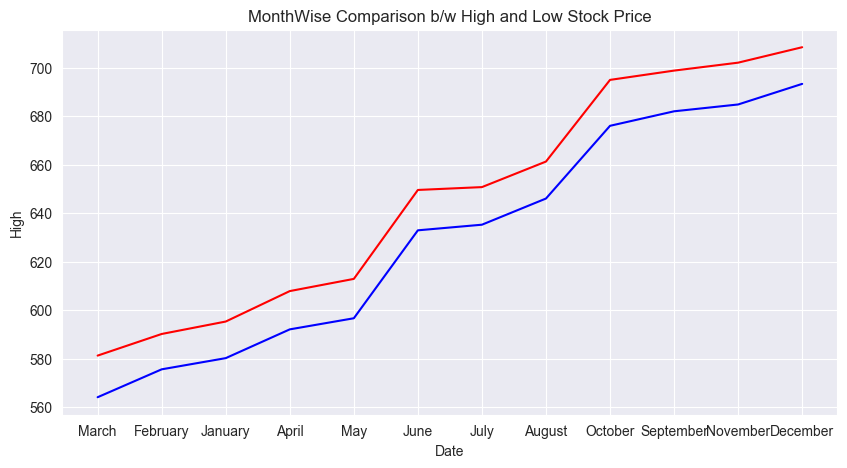

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(x=monthwise.index, y=monthwise["High"],color='red')
sns.lineplot(x=monthwise.index, y=monthwise["Low"],color='blue')
plt.title('MonthWise Comparison b/w High and Low Stock Price')
plt.show()

### Visualizations

In [20]:
#visualize the each column
sns.set_style('darkgrid')

### Line plots

Text(0.5, 1.0, 'Date vs Close')

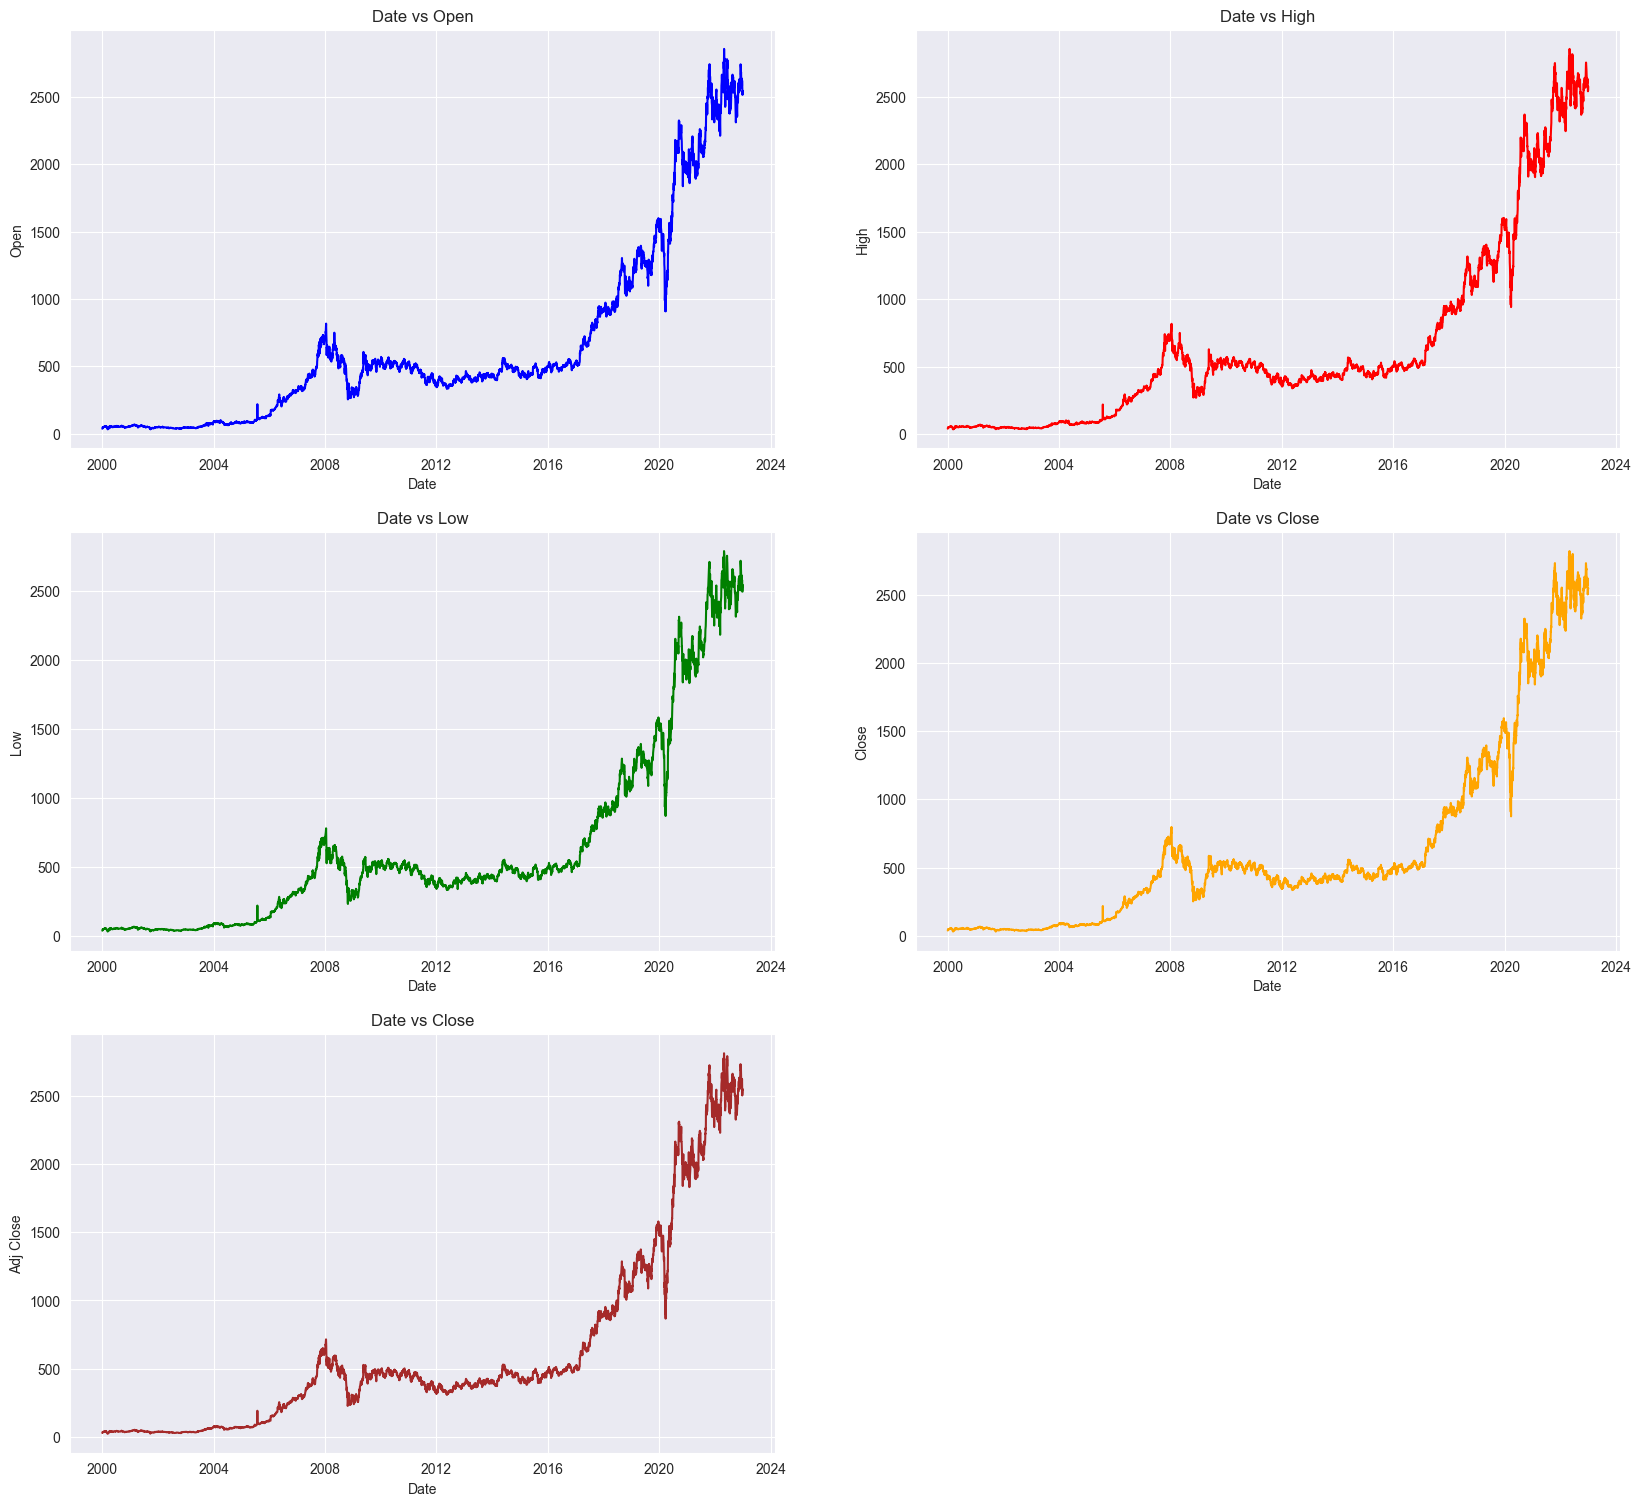

In [21]:
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
plt.plot(df['Open'],color="Blue")
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Date vs Open")
#plot2
plt.subplot(4,2,2)
plt.plot(df['High'],color="Red")
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Date vs High")
#plot3
plt.subplot(4,2,3)
plt.plot(df['Low'],color="Green")
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Date vs Low")
#plot4
plt.subplot(4,2,4)
plt.plot(df['Close'],color="Orange")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Date vs Close")
#plot5
plt.subplot(4,2,5)
plt.plot(df['Adj Close'],color="Brown")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Date vs Close")

### Distribution Plots

Text(0.5, 1.0, 'Distplot-Adj Close')

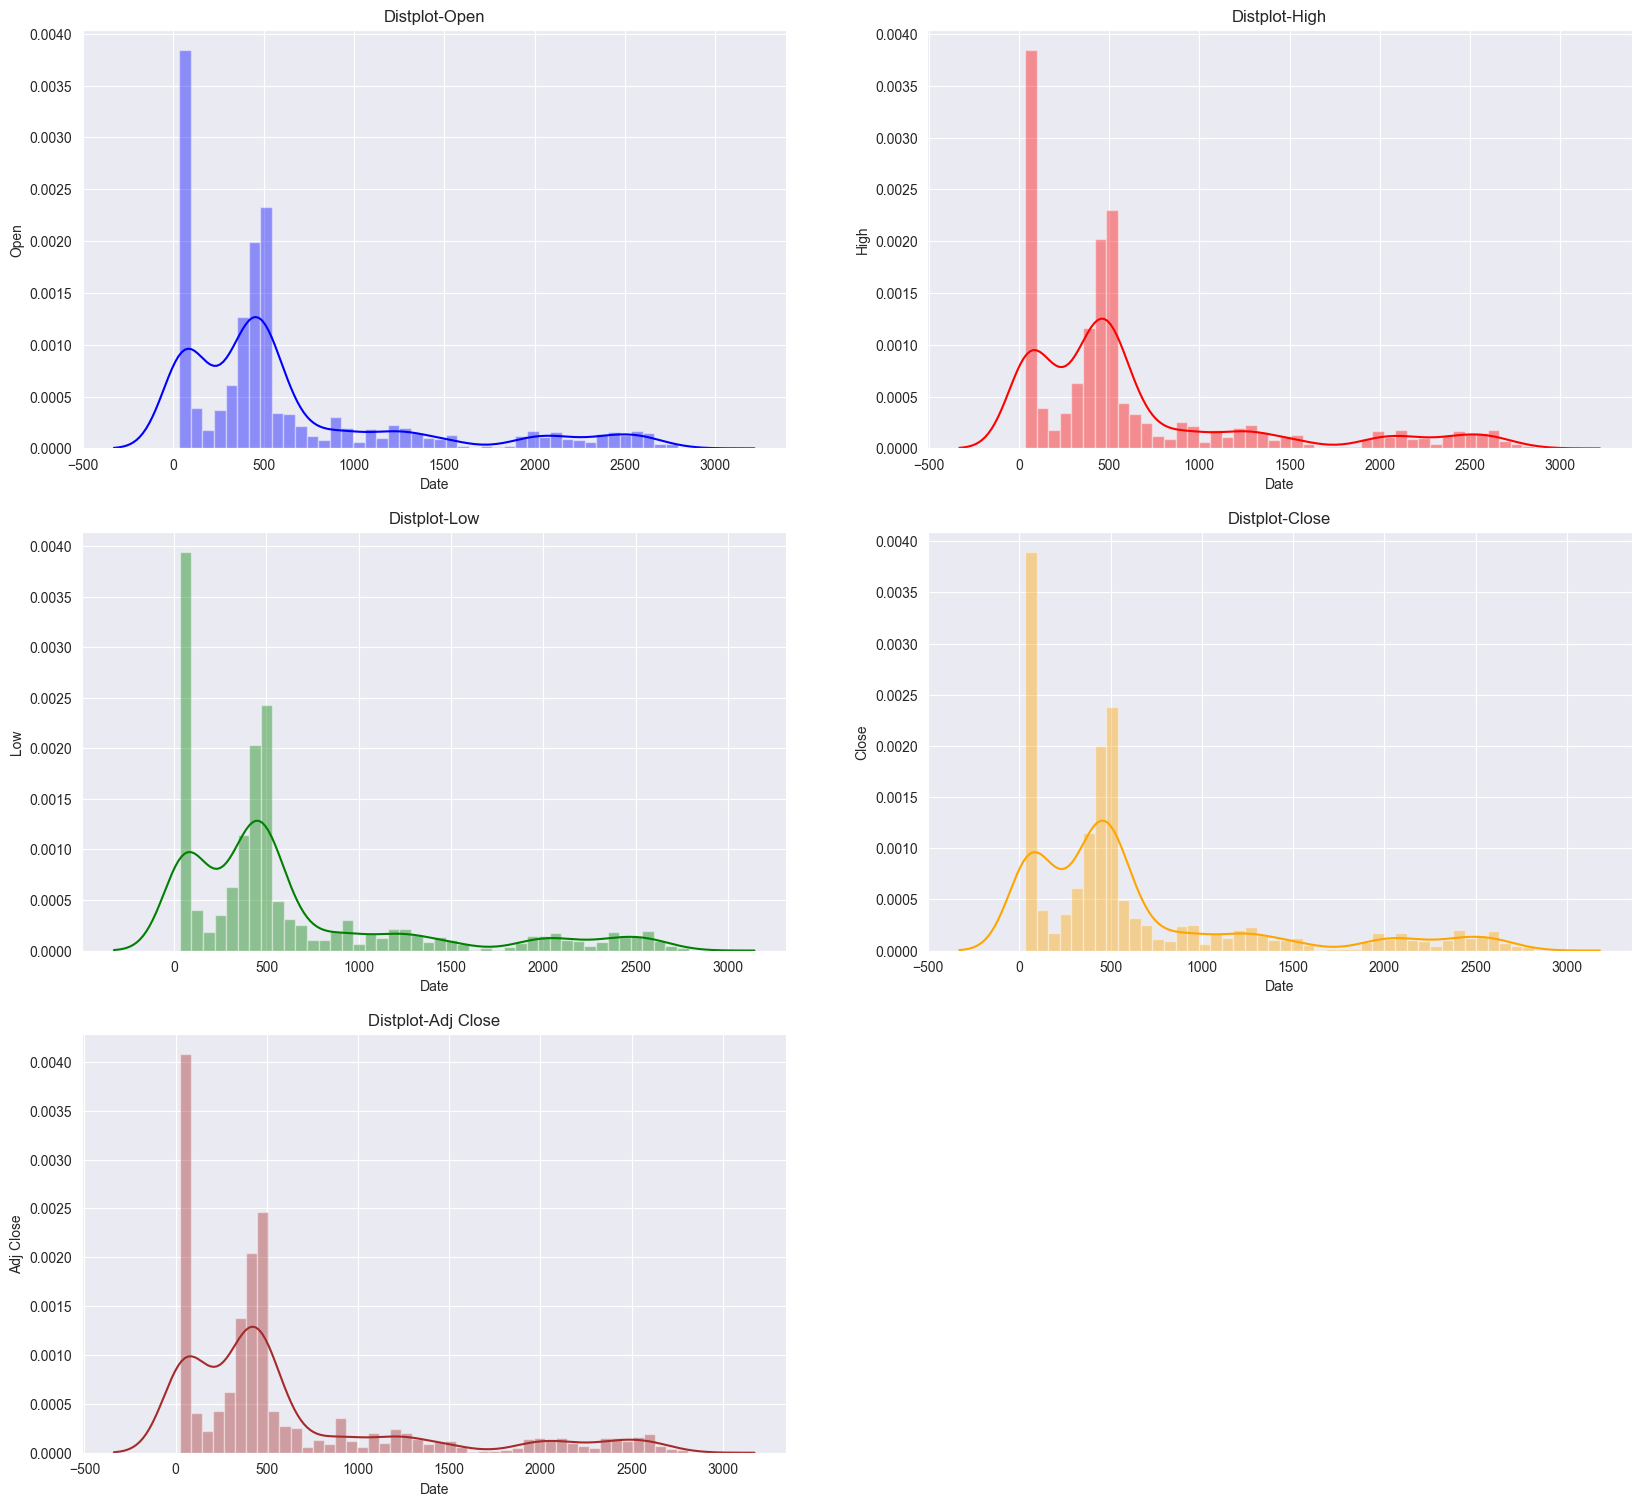

In [59]:
#creating Distribution Plot
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
sns.distplot(df['Open'],color='blue')
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Distplot-Open")
#plot2
plt.subplot(4,2,2)
sns.distplot(df['High'],color='red')
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Distplot-High")
#plot3
plt.subplot(4,2,3)
sns.distplot(df['Low'],color='green')
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Distplot-Low")
#plot4
plt.subplot(4,2,4)
sns.distplot(df['Close'],color='orange')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Distplot-Close")
#plot5
plt.subplot(4,2,5)
sns.distplot(df['Adj Close'],color='brown')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Distplot-Adj Close")

### Boxplots

Text(0.5, 1.0, 'Boxplot-Adj Close')

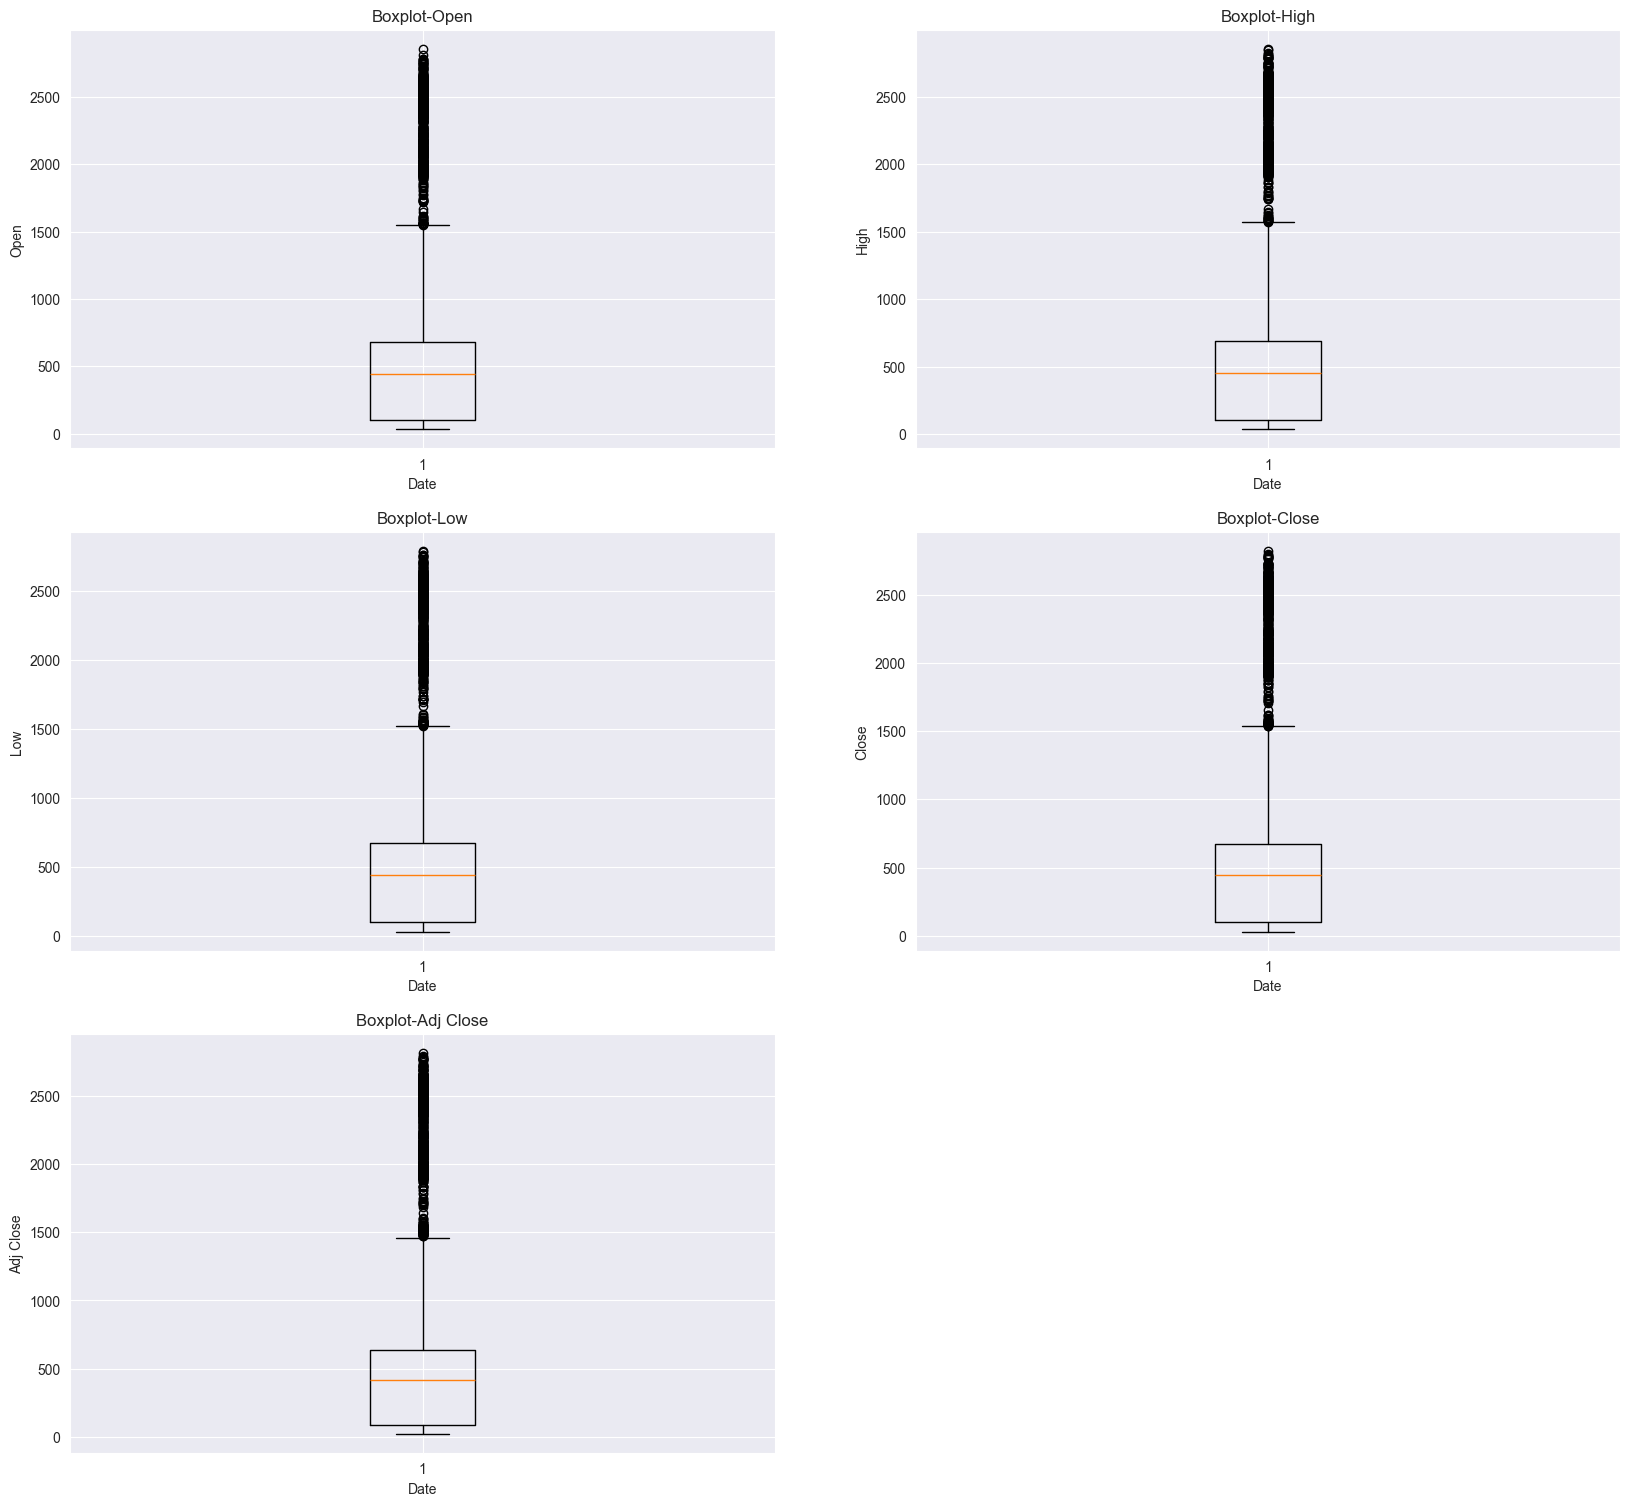

In [60]:
#creating boxplots
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
plt.boxplot(df['Open'])
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Boxplot-Open")
#plot2
plt.subplot(4,2,2)
plt.boxplot(df['High'])
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Boxplot-High")
#plot3
plt.subplot(4,2,3)
plt.boxplot(df['Low'])
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Boxplot-Low")
#plot4
plt.subplot(4,2,4)
plt.boxplot(df['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boxplot-Close")
#plot5
plt.subplot(4,2,5)
plt.boxplot(df['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Boxplot-Adj Close")

In [24]:
def cap_outliers(df, multiplier=1.5):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to modify

    for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        mean = df[col].mean()

        # Cap outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [25]:
df_new =cap_outliers(df)
df_new.shape

(4406, 6)

### Boxplots after capping outliers

Text(0.5, 1.0, 'Boxplot-Adj Close')

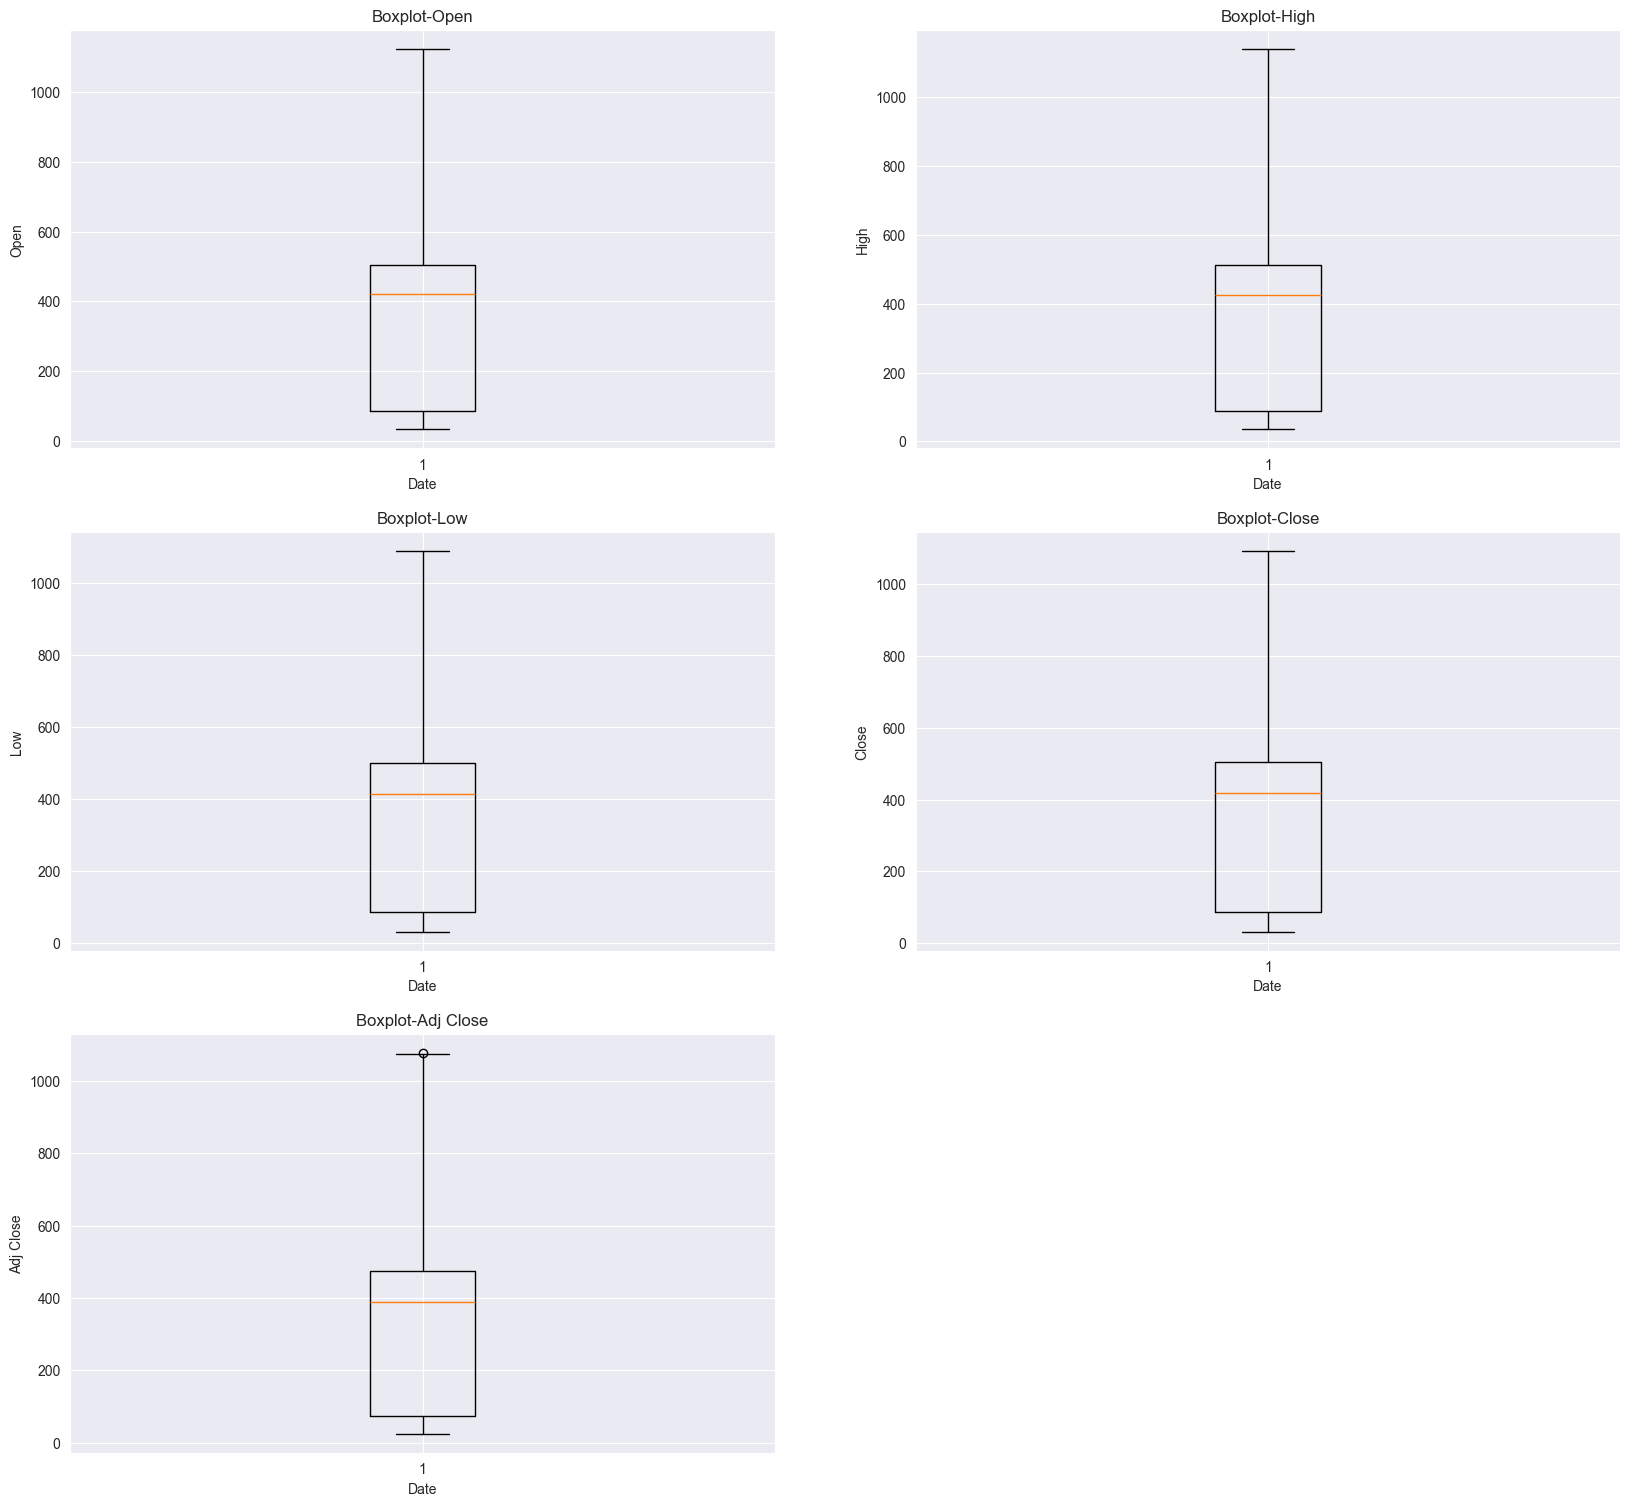

In [26]:
#Boxplot after capping the outliers
#creating boxplots
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
plt.boxplot(df_new['Open'])
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Boxplot-Open")
#plot2
plt.subplot(4,2,2)
plt.boxplot(df_new['High'])
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Boxplot-High")
#plot3
plt.subplot(4,2,3)
plt.boxplot(df_new['Low'])
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Boxplot-Low")
#plot4
plt.subplot(4,2,4)
plt.boxplot(df_new['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boxplot-Close")
#plot5
plt.subplot(4,2,5)
plt.boxplot(df_new['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Boxplot-Adj Close")


### Distribution plots after capping outliers

Text(0.5, 1.0, 'Boxplot-Adj Close')

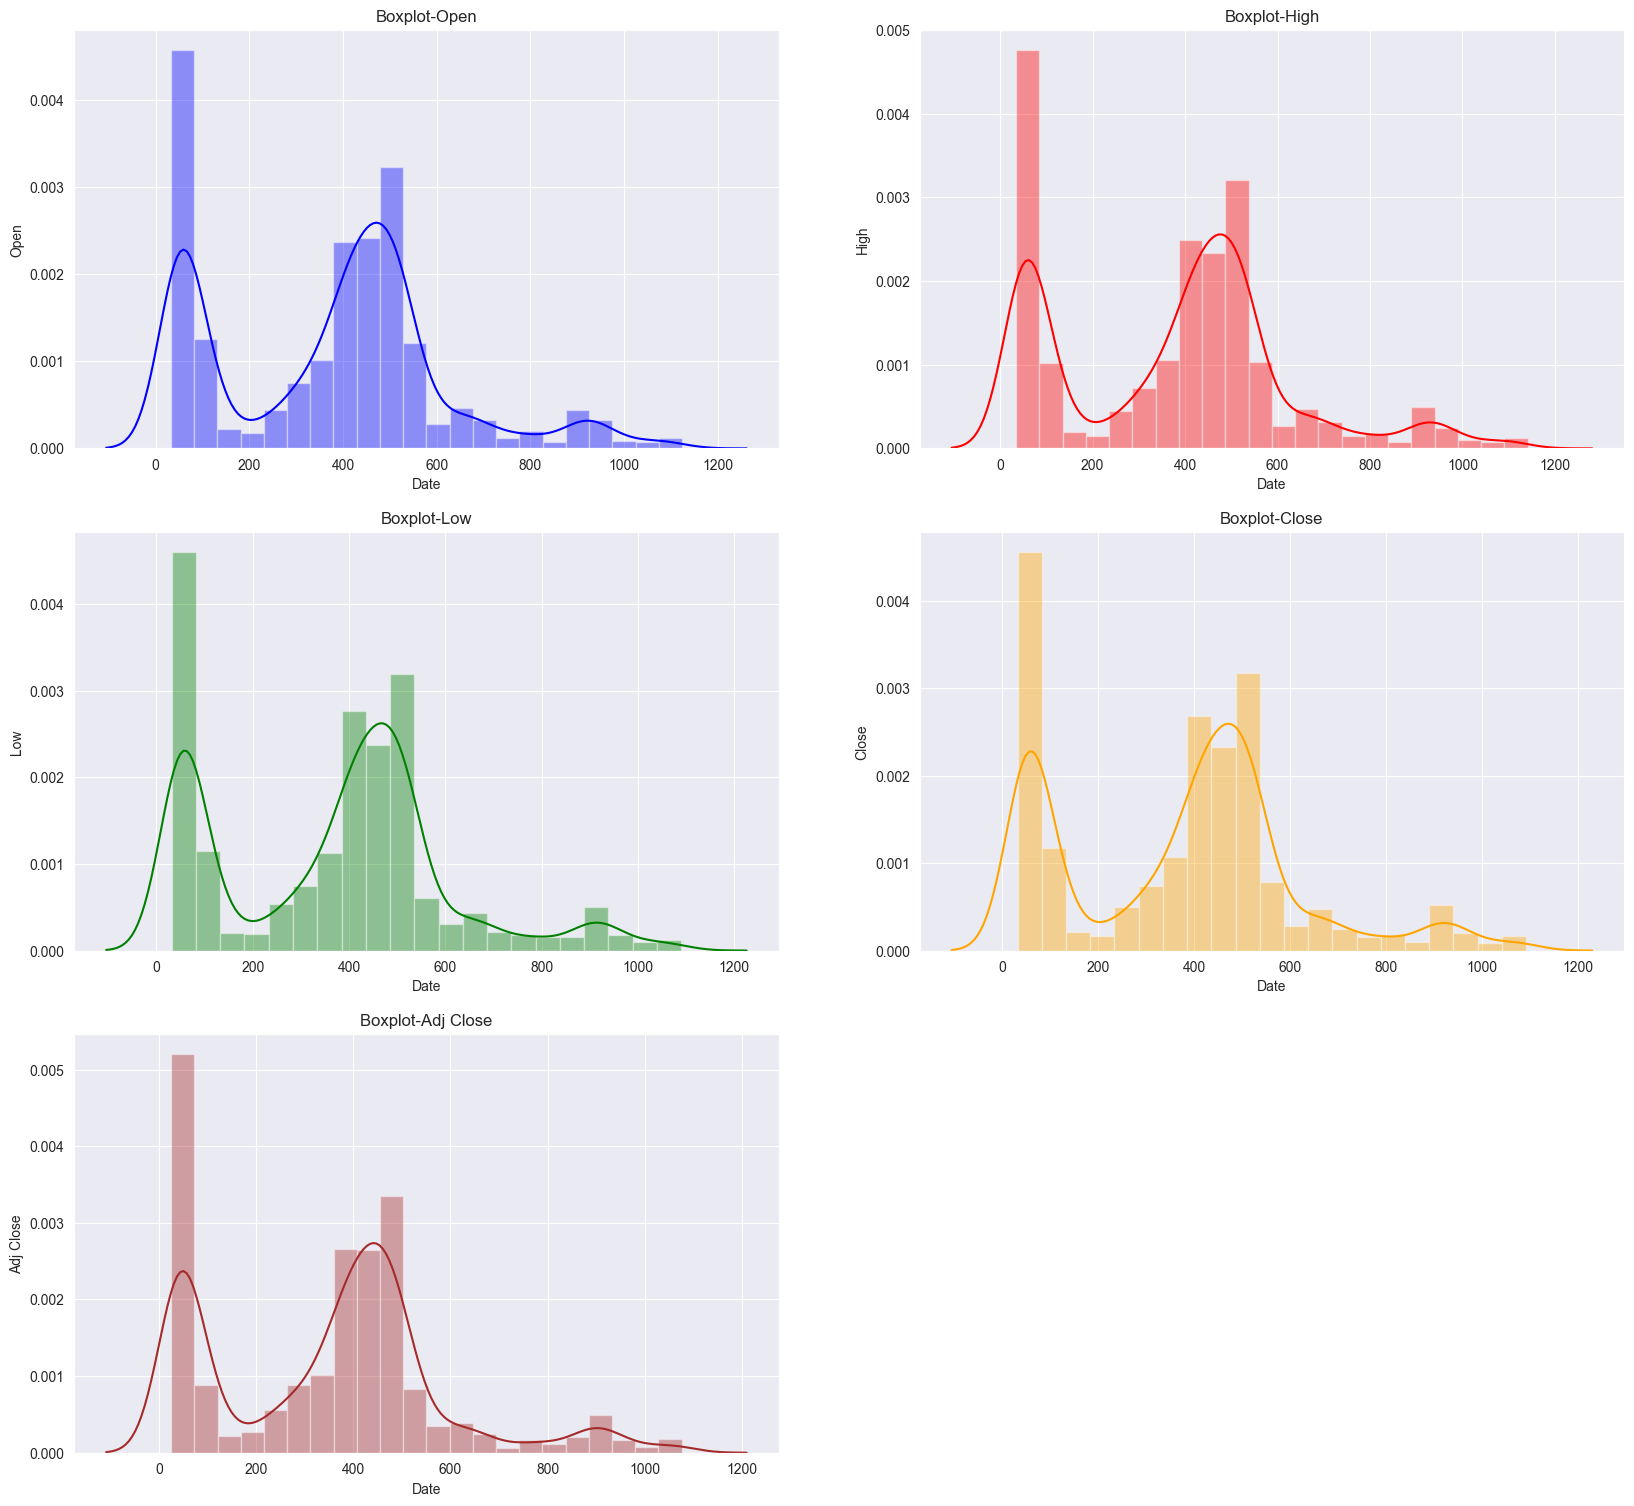

In [61]:
#creating Distribution Plot after capping outliers
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
sns.distplot(df_new['Open'],color='blue')
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Boxplot-Open")
#plot2
plt.subplot(4,2,2)
sns.distplot(df_new['High'],color='red')
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Boxplot-High")
#plot3
plt.subplot(4,2,3)
sns.distplot(df_new['Low'],color='green')
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Boxplot-Low")
#plot4
plt.subplot(4,2,4)
sns.distplot(df_new['Close'],color='orange')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boxplot-Close")
#plot5
plt.subplot(4,2,5)
sns.distplot(df_new['Adj Close'],color='brown')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Boxplot-Adj Close")

### KDE plot for each column

Text(0.5, 1.0, 'Boxplot-Adj Close')

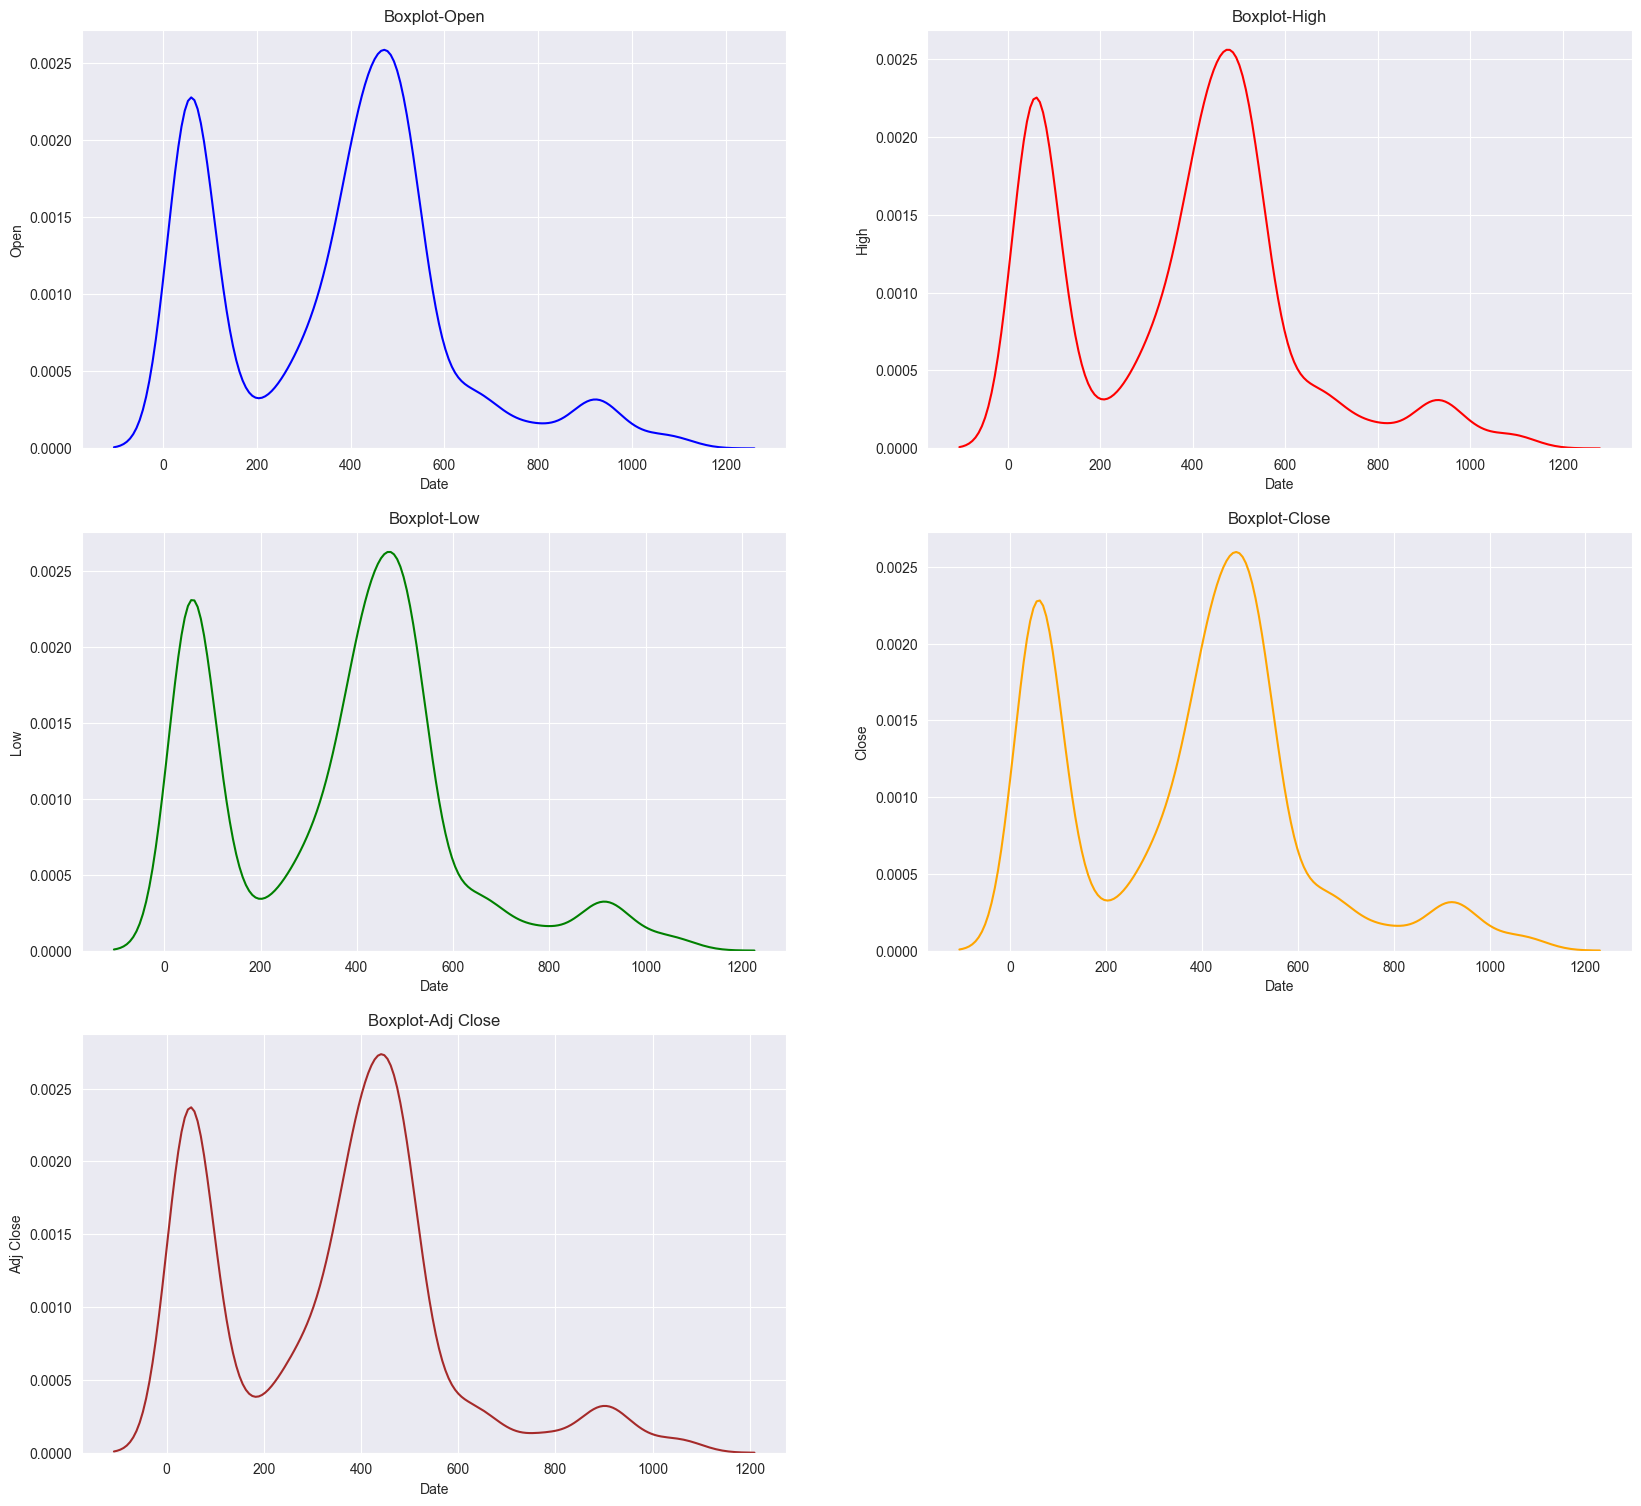

In [63]:
plt.figure(figsize=(20,25))
#plot1
plt.subplot(4,2,1)
sns.kdeplot(df_new['Open'],color='blue')
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Boxplot-Open")
#plot2
plt.subplot(4,2,2)
sns.kdeplot(df_new['High'],color='red')
plt.xlabel("Date")
plt.ylabel("High")
plt.title("Boxplot-High")
#plot3
plt.subplot(4,2,3)
sns.kdeplot(df_new['Low'],color='green')
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Boxplot-Low")
#plot4
plt.subplot(4,2,4)
sns.kdeplot(df_new['Close'],color='orange')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boxplot-Close")
#plot5
plt.subplot(4,2,5)
sns.kdeplot(df_new['Adj Close'],color='brown')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Boxplot-Adj Close")

In [64]:
#volume column 

In [85]:
print("Volumes max before :",df['Volume'].max())
print("Volumes max before:",df['Volume'].min())
print("Volumes mean before: ", df['Volume'].mean().round(2))

Volumes max before : 291801549.0
Volumes max before: 0.0
Volumes mean before:  16816915.6


In [87]:
print("Volumes max after:",df_new['Volume'].max())
print("Volumes max after:",df_new['Volume'].min())
print("Volumes mean after: ", df_new['Volume'].mean().round(2))

Volumes max after: 49353042.0
Volumes max after: 0.0
Volumes mean after:  14726580.46


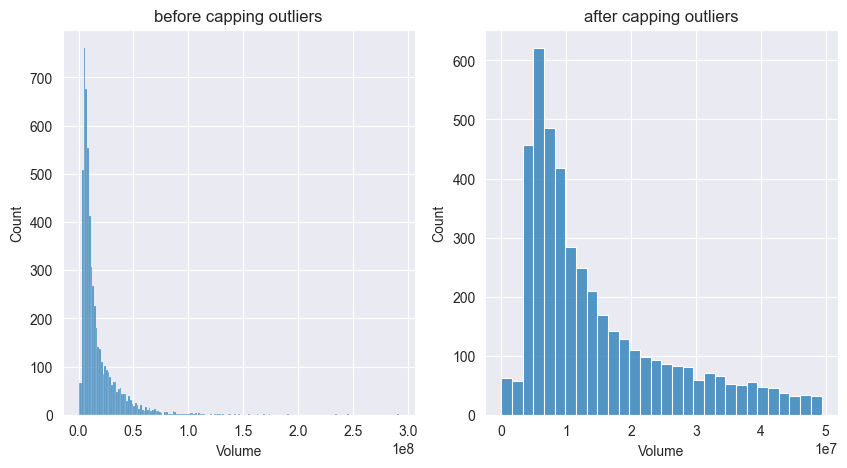

In [82]:
#before capping outliers
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Volume'])
plt.title('before capping outliers')
plt.subplot(1,2,2)
sns.histplot(df_new['Volume'])
plt.title('after capping outliers')
plt.show()

In [88]:
#Date vs volume

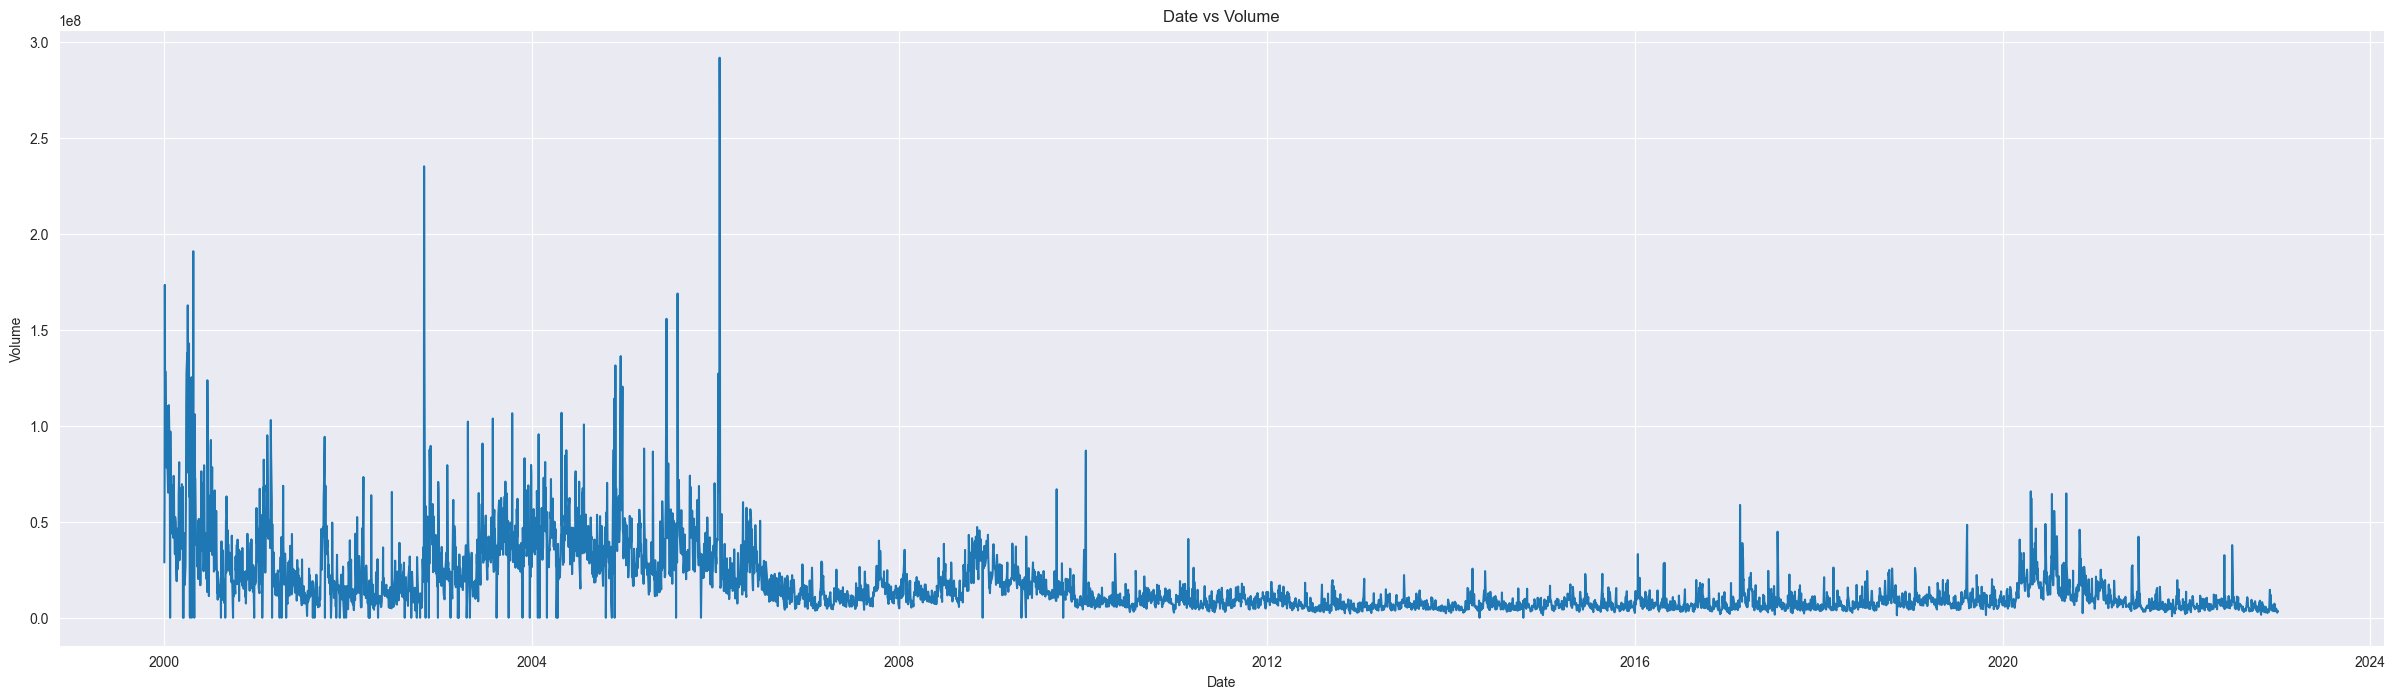

In [102]:
figure=plt.figure(figsize=(30,8))
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

### MonthWise Stock Price of Volume (max)

In [164]:
monthwise= df1.groupby(df1['Date'].dt.strftime('%B'))['Volume'].max()
monthwise_df = pd.DataFrame(monthwise)
monthwise_df

,Volume
Date,
April,190967027.0
August,168920249.0
December,136329286.0
February,95050871.0
January,291801549.0
July,103787779.0
June,155761813.0
March,127348768.0
May,106153132.0


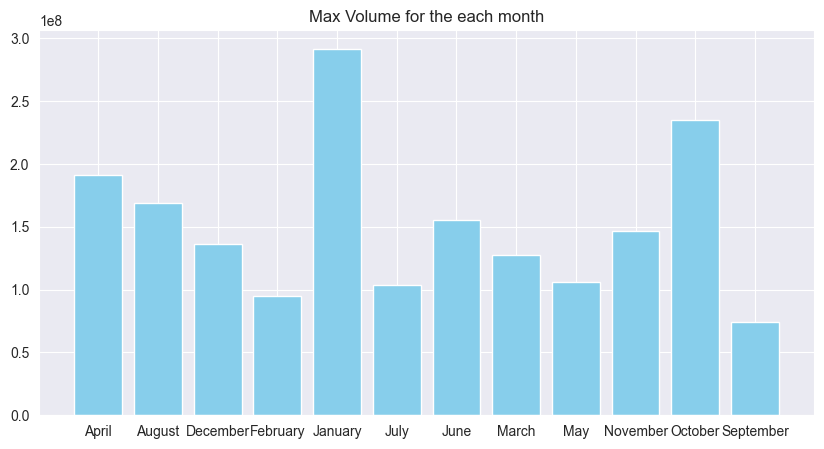

In [163]:
plt.figure(figsize=(10,5))
plt.bar(x=monthwise_df.index,height=monthwise_df['Volume'],color='skyblue')
plt.title('Max Volume for the each month')
plt.show()

# Finding long-term and short-term trends
### Moving Average

In [166]:
#finding the moving average for 30 days and 100 days
df_MA=df_new.copy()
df_MA['30-day MA']=df_new['Close'].rolling(window=30).mean()
df_MA['100-day MA']=df_new['Close'].rolling(window=100).mean()

In [170]:
df_MA.tail(3)

,Open,High,Low,Close,Adj Close,Volume,30-day MA,100-day MA
Date,,,,,,,,
2020-03-30,1030.828735,1064.707642,1010.422180,1020.774109,1010.651794,13951078.0,1047.291060,1005.032301
2020-04-01,1111.712036,1114.040039,1035.385620,1070.304565,1059.691162,19197220.0,1048.090153,1006.192800
2020-04-03,1123.797485,1123.797485,1046.381348,1067.332764,1056.748779,19091236.0,1048.174357,1007.230464


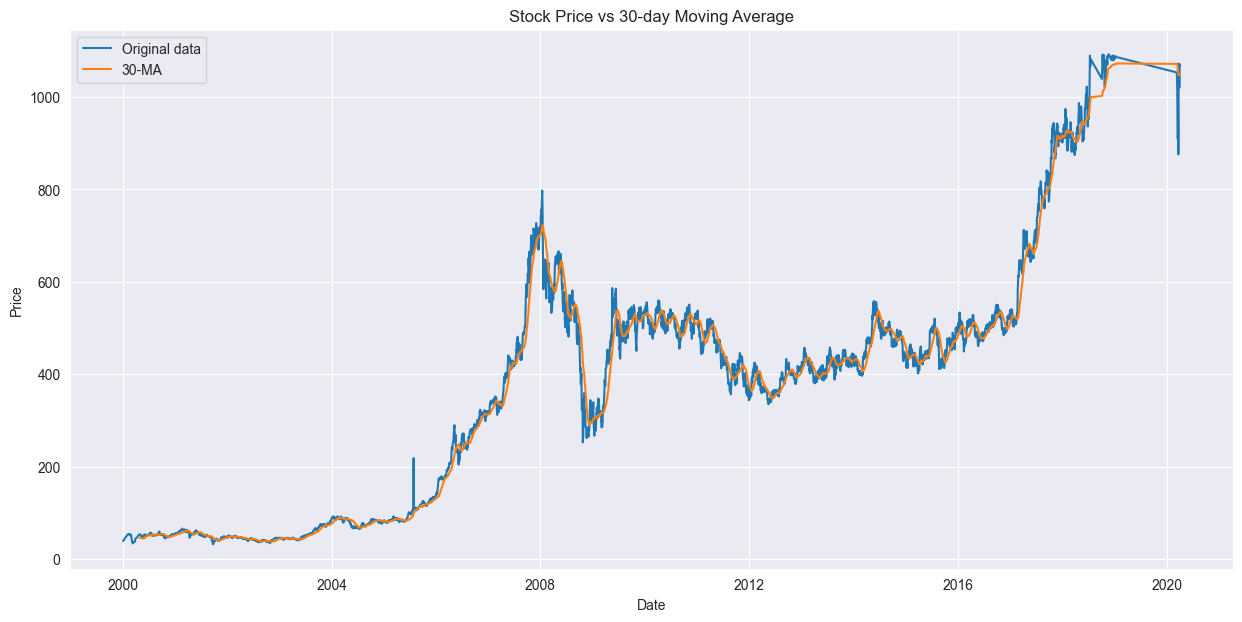

In [181]:
plt.figure(figsize=(15,7))
plt.plot(df_MA['Close'],label='Original data')
plt.plot(df_MA['30-day MA'],label='30-MA')
plt.legend(loc='best')
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

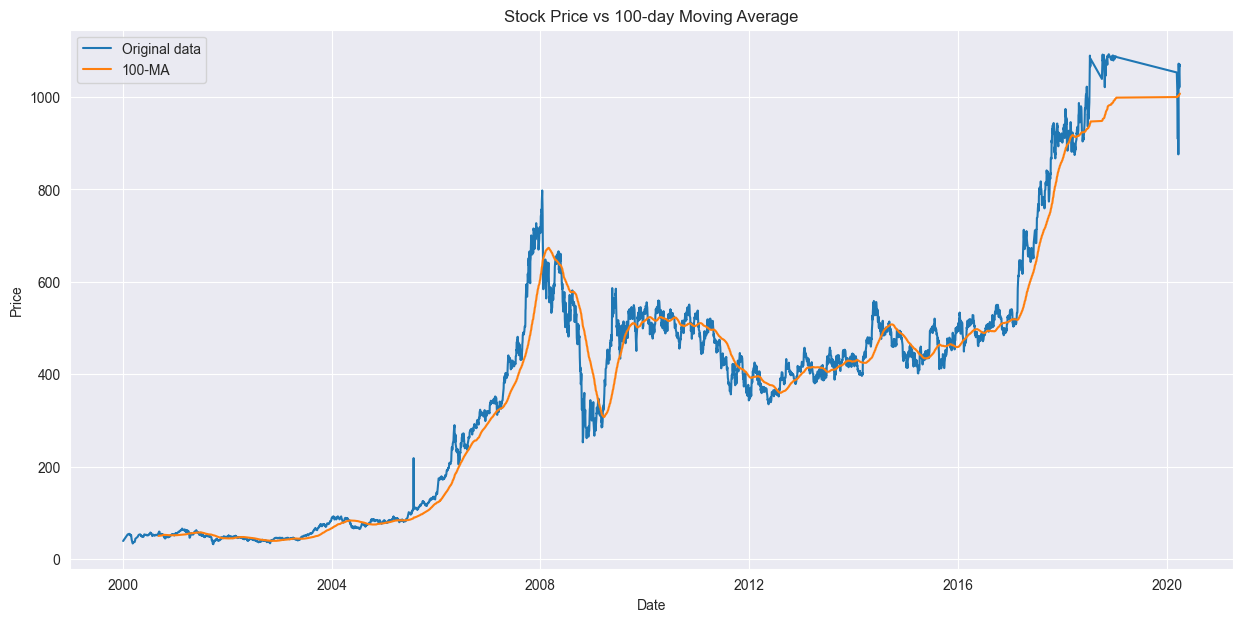

In [180]:
plt.figure(figsize=(15,7))
plt.plot(df_MA['Close'],label='Original data')
plt.plot(df_MA['100-day MA'],label='100-MA')
plt.legend(loc='best')
plt.title('Stock Price vs 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Moving Average of 30 and 100 days for the original Dataset 

In [182]:
df_MA1=df.copy()
df_MA1['30-day MA']=df['Close'].rolling(window=30).mean()
df_MA1['100-day MA']=df['Close'].rolling(window=100).mean()

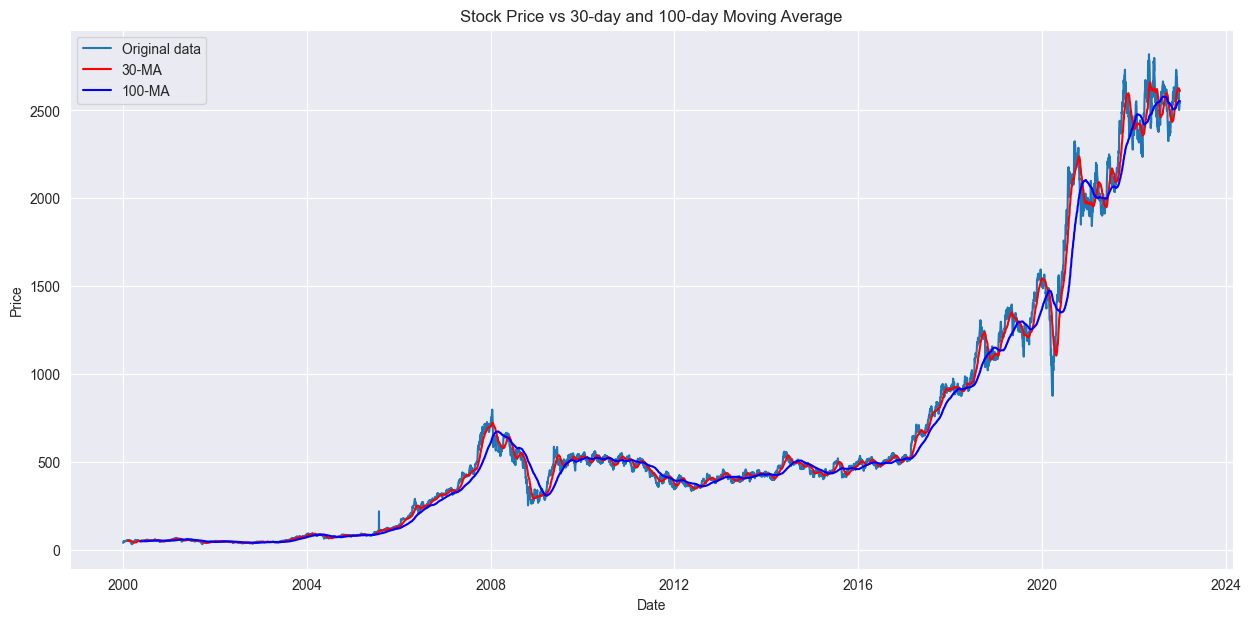

In [186]:
plt.figure(figsize=(15,7))
plt.plot(df_MA1['Close'],label='Original data')
plt.plot(df_MA1['30-day MA'],label='30-MA',color='red')
plt.plot(df_MA1['100-day MA'],label='100-MA',color='blue')
plt.legend(loc='best')
plt.title('Stock Price vs 30-day and 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Correlation

In [187]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999870,0.999861,0.999731,0.999499,-0.323025
High,0.999870,1.000000,0.999825,0.999892,0.999633,-0.321129
Low,0.999861,0.999825,1.000000,0.999883,0.999691,-0.324540
Close,0.999731,0.999892,0.999883,1.000000,0.999772,-0.322671
Adj Close,0.999499,0.999633,0.999691,0.999772,1.000000,-0.317065
Volume,-0.323025,-0.321129,-0.324540,-0.322671,-0.317065,1.000000


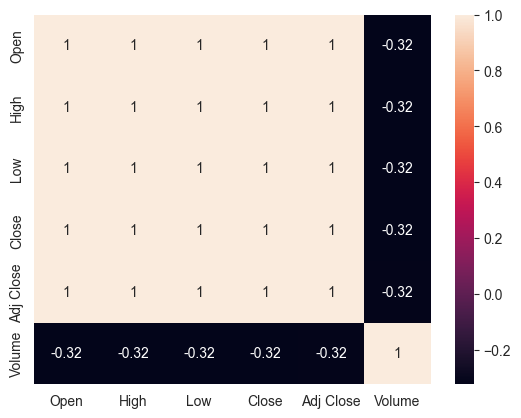

In [189]:
#using heatmap to visualize the correlation
sns.heatmap(df.corr(),annot=True,cbar='YlGnBu')
plt.show()